# Analyze Distribution

Analyzes the distribution of loss values.

In [22]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

#os.environ['JAX_PLATFORM_NAME'] = "cpu"
#os.environ['JAX_PLATFORMS'] = "cpu"

In [23]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import statsmodels.api as sm

from analyzers import database, defaultvalues as dv, loss as loss_analyzer

from simulation.simulate_full import run_entire_simulation
import jax


In [24]:
sim_keys = np.arange(1, 25, dtype=int)


def get_sim_result(key):
    return run_entire_simulation(3.0, dv.N_STEPS, dv.N_MOLECULES_PER_AXIS, dv.N_SNAPSHOTS, dv.N_Q, key)

In [25]:
patterns = jax.vmap(get_sim_result)(sim_keys)

2024-10-07 13:05:35.598658: W external/xla/xla/service/hlo_rematerialization.cc:3005] Can't reduce memory use below 3.66GiB (3930593163 bytes) by rematerialization; only reduced to 5.25GiB (5633321828 bytes), down from 4.99GiB (5358715500 bytes) originally
2024-10-07 13:16:39.085009: W external/xla/xla/service/hlo_rematerialization.cc:3005] Can't reduce memory use below 1.68GiB (1804738560 bytes) by rematerialization; only reduced to 2.08GiB (2239488000 bytes), down from 2.08GiB (2239488000 bytes) originally


In [30]:
database.set_filename("../data/loss_analyzer/distribution_analysis.npz")
database.save_results(sim_keys, patterns)

In [31]:
keys, patterns = database.load_result()

N_PATTERNS_TOTAL, N_QS = patterns.shape

losses = []
for i, x in enumerate(patterns):
    for j, y in enumerate(patterns):
        if i == j:
            continue
        losses.append(loss_analyzer.L1_loss(x, y))

losses = np.array(losses)
print(losses.shape)

(552,)


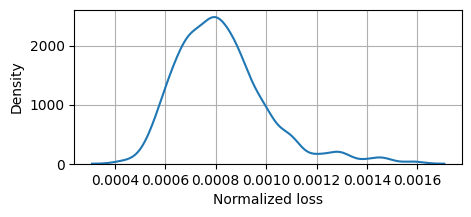

In [32]:
sns.kdeplot(losses, bw_adjust=0.8)
plt.xlabel("Normalized loss")
plt.ylabel("Density")
plt.grid()
plt.gcf().set_size_inches(5, 2)
plt.savefig("../plots/analysis_distribution.svg")
plt.show()

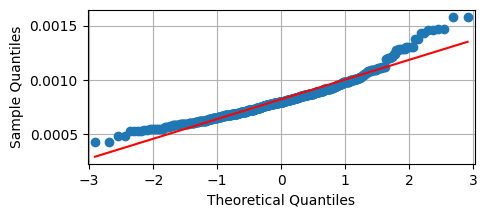

In [33]:
sm.qqplot(losses, line='s')
plt.grid()
plt.gcf().set_size_inches(5, 2)
plt.savefig("../plots/analysis_distribution_qq.svg")
plt.show()